# Vibrations and oscillations with normal coordinates

We have just seen the solution to the problem of oscillation via diagonalization and an eigenvalue problem. We will now look at the problem of vibrations in a different way, namely by solving the differential equation directly. This will allow us to see the connection between the two approaches.

Let us introduce the matrix of eigenvectors $A$ and the matrix of eigenvalues $\Lambda$:

$$A = [a_1, a_2, \ldots, a_n]$$

The matrix diagonalization problem can be written as:

$$A^T T A = \mathcal 1, \quad A^T \hat V A = \Lambda$$

We will create a **normal coordinate** vector $\xi$ such that:

$$\eta = A \xi, \quad \dot \eta = A \dot \xi$$

where $\eta$ is the vector of displacements in the original coordinates. We will also define the vector of velocities $\dot \eta$ and the vector of accelerations $\ddot \eta$. The lagrangian suddenly becomes rather simple:

$$\mathcal L = \frac{1}{2} \dot \eta^T T \dot \eta - \frac{1}{2} \eta^T \hat V \eta = \frac{1}{2}\sum_\alpha(\dot xi_\alpha^2 - \omega_\alpha^2 \xi_\alpha^2)$$

where $\omega_\alpha$ is the $\alpha$-th eigenvalue. The equations of motion are:

$$\ddot \xi_\alpha + \omega_\alpha^2 \xi_\alpha = 0$$

## Lets play around with this

┌ Info: Saved animation to /home/jose/Documents/STUDY/PhD/ClassicalMech/notes/03_vibrations/oscillations.gif
└ @ Plots /home/jose/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/PhD/ClassicalMech/notes/03_vibrations/oscillations.gif")
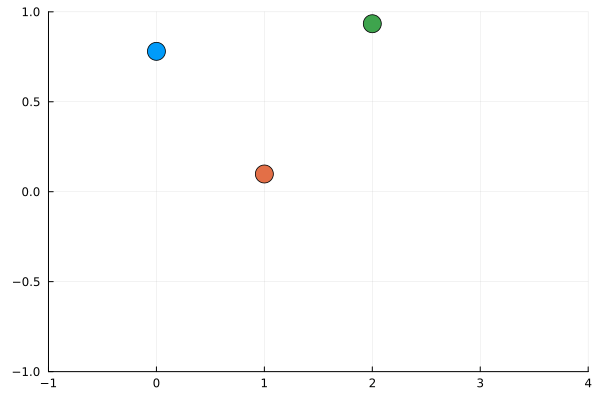

In [5]:
using LinearAlgebra
using Plots

T = diagm([1.0, 2.0, 3.0])
V = diagm([4.0, 5.0, 6.0])
Λ, A = eigen(inv(T) * V)
ω = sqrt.(Λ)
ξ_0 = rand(3)
ẋ_0 = rand(3)

η(ξ) = A * ξ

function equations_of_motion(ξ, ω)
    return -ω.^2 .* ξ
end

dt = 0.01
n_steps = 1000
ξ = copy(ξ_0)
ẋ = copy(ẋ_0)
anim = @animate for step = 1:n_steps
    global ξ, ẋ
    ξ += ẋ * dt
    ẋ += equations_of_motion(ξ, ω) * dt
    displacements = η(ξ)
    p = plot(seriestype = :scatter, xlims = (-1, 4), ylims = (-1, 1), legend = false)
    for i = 1:3
        scatter!([i-1], [displacements[i]], markersize = 10)
    end
    plot!(p)
end

gif(anim, "oscillations.gif", fps = 30)
